<h1>Corona Virus Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("covid_19_data.csv",parse_dates=["ObservationDate"])

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<h3>The 'SNo' seems to be an unncessary column. So I dropped it.</h3>

In [5]:
df = df.drop(['SNo'],axis=1)

In [7]:
df.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2105,2020-02-22,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
2106,2020-02-22,"Sacramento County, CA",US,2020-02-21T23:13:16,1.0,0.0,0.0
2107,2020-02-22,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
2108,2020-02-22,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0
2109,2020-02-22,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0


In [9]:
df.describe(include='all')

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,2110,1534,2110,2110,2110.000000,2110.000000,2110.000000
unique,32,71,37,609,NaN,NaN,NaN
top,2020-02-21 00:00:00,Hebei,Mainland China,1/31/2020 23:59,NaN,NaN,NaN
freq,84,32,986,62,NaN,NaN,NaN
first,2020-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,538.973460,13.546919,78.179147
std,NaN,NaN,NaN,NaN,4443.023939,139.516579,656.982337
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000


In [11]:
df.rename({'Province/State':'Province','Country/Region':'Country'},axis=1,inplace=True)

In [12]:
df.head()

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<h3>From the first and last 5 rows  the column "Last Update" has different formats. Not only that, in some cases the 'Last Update' datetime is prior to the "ObservationDate" which seems confusing to me. I will have to gather more insights on the columns for understanding that. So for now I am dropping this column.</h3>

In [13]:
df = df.drop(['Last Update'],axis=1)

In [15]:
df['Province'].value_counts().sort_values()

Chicago                                  1
Omaha, NE (From Diamond Princess)        1
Lackland, TX (From Diamond Princess)     1
Ashland, NE                              1
Travis, CA (From Diamond Princess)       1
                                        ..
Hainan                                  32
Guangxi                                 32
Zhejiang                                32
Ningxia                                 32
Hebei                                   32
Name: Province, Length: 71, dtype: int64

<b>From the above data it is very clear that the number of provinces affected is huge</b>

In [16]:
df['Country'].value_counts().sort_values()

Ivory Coast               1
Mexico                    1
Colombia                  1
Brazil                    1
Israel                    2
Lebanon                   2
Iran                      4
Egypt                     9
Others                   16
Belgium                  19
Spain                    22
Italy                    23
Sweden                   23
Russia                   23
UK                       23
India                    24
Finland                  25
Philippines              25
United Arab Emirates     25
Germany                  26
Sri Lanka                27
Cambodia                 27
Nepal                    29
Malaysia                 30
France                   30
Singapore                31
Vietnam                  31
South Korea              32
Taiwan                   32
Japan                    32
Macau                    32
Thailand                 32
Hong Kong                32
Canada                   73
Australia               105
US                  

In [17]:
df['ObservationDate'].value_counts().sort_values()

2020-01-22    38
2020-01-24    41
2020-01-25    44
2020-01-23    46
2020-01-26    47
2020-01-27    51
2020-01-28    52
2020-01-29    54
2020-01-30    58
2020-01-31    62
2020-02-02    67
2020-02-01    67
2020-02-03    68
2020-02-04    70
2020-02-06    71
2020-02-05    71
2020-02-10    72
2020-02-08    72
2020-02-09    72
2020-02-07    72
2020-02-12    73
2020-02-11    73
2020-02-13    74
2020-02-18    75
2020-02-16    75
2020-02-15    75
2020-02-14    75
2020-02-17    75
2020-02-19    76
2020-02-20    76
2020-02-22    84
2020-02-21    84
Name: ObservationDate, dtype: int64

In [19]:
dates = list(df['ObservationDate'].dt.day)
df['ObservationDate']

0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
2105   2020-02-22
2106   2020-02-22
2107   2020-02-22
2108   2020-02-22
2109   2020-02-22
Name: ObservationDate, Length: 2110, dtype: datetime64[ns]

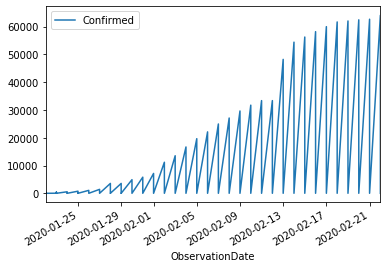

In [20]:
df.plot(x='ObservationDate',y='Confirmed')

<h3>The confirmation rate has spiked up suddenly from 11-02-2020 which seems suspicious. Maybe they were not realeasing all the stats for a long time due to time consumption in confirmation and finally they released it all at once.</h3>

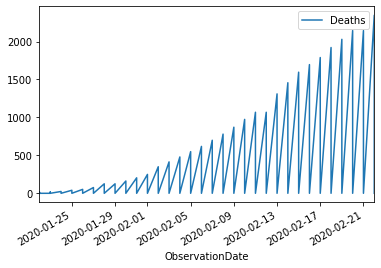

In [21]:
ax = df.plot(x='ObservationDate',y='Deaths')

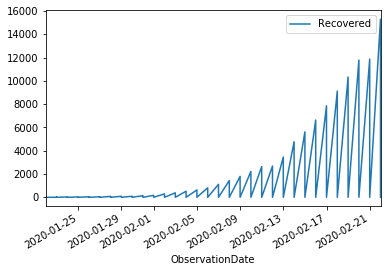

In [22]:
df.plot(x='ObservationDate',y='Recovered')

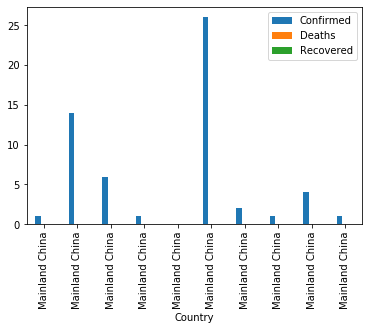

In [23]:
df[:10].plot.bar(x='Country',y=['Confirmed','Deaths','Recovered'])

In [24]:
all_country_recovery = {}
all_country_death = {}
for country in df['Country']:
    if country not in all_country_recovery and country != 'Mainland China':
        all_country_recovery[country] = df.loc[df['Country']==country,'Recovered'].sum()
        all_country_death[country] = df.loc[df['Country']==country,'Deaths'].sum()

In [25]:
all_country_recovery.values()

dict_values([32.0, 55.0, 26.0, 46.0, 184.0, 253.0, 132.0, 293.0, 11.0, 110.0, 106.0, 122.0, 0.0, 0.0, 0.0, 38.0, 11.0, 15.0, 11.0, 15.0, 0.0, 69.0, 11.0, 34.0, 21.0, 1.0, 60.0, 22.0, 0.0, 16.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0])

In [26]:
all_country_death.values()

dict_values([23.0, 0.0, 7.0, 0.0, 10.0, 0.0, 5.0, 0.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 13.0, 0.0, 0.0])

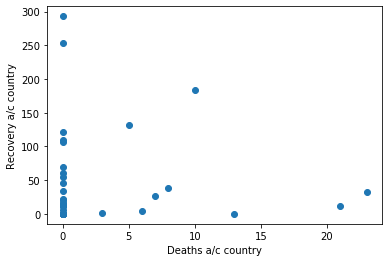

In [27]:
plt.scatter(all_country_death.values(),all_country_recovery.values())
plt.xlabel('Deaths a/c country')
plt.ylabel('Recovery a/c country')
plt.show()

<h2>I tried creating a scatter plot between the recovery and death cases for different countries. But it does not seem possible because of Maniland China being an extraordinary outlier. So I removed that country and plotted it.</h2>

In [28]:
all_province_recovery = {}
all_province_death = {}
for province in df['Province']:
    if province not in all_province_recovery and province != 'Hubei':
        all_province_recovery[province] = df.loc[df['Province']==province,'Recovered'].sum()
        all_province_death[province] = df.loc[df['Province']==province,'Deaths'].sum()

In [164]:
all_province_recovery

{'Anhui': 4098.0,
 'Beijing': 1620.0,
 'Chongqing': 2805.0,
 'Fujian': 1250.0,
 'Gansu': 720.0,
 'Guangdong': 6541.0,
 'Guangxi': 858.0,
 'Guizhou': 666.0,
 'Hainan': 809.0,
 'Hebei': 1585.0,
 'Heilongjiang': 1211.0,
 'Henan': 6466.0,
 'Hong Kong': 32.0,
 'Hunan': 6594.0,
 'Inner Mongolia': 155.0,
 'Jiangsu': 3251.0,
 'Jiangxi': 3932.0,
 'Jilin': 437.0,
 'Liaoning': 555.0,
 'Macau': 55.0,
 'Ningxia': 469.0,
 'Qinghai': 176.0,
 'Shaanxi': 1086.0,
 'Shandong': 2495.0,
 'Shanghai': 1960.0,
 'Shanxi': 766.0,
 'Sichuan': 2209.0,
 'Taiwan': 26.0,
 'Tianjin': 515.0,
 'Tibet': 11.0,
 'Washington': 0.0,
 'Xinjiang': 155.0,
 'Yunnan': 733.0,
 'Zhejiang': 7014.0,
 nan: 0.0,
 'Chicago': 0.0,
 'Illinois': 0.0,
 'California': 0.0,
 'Arizona': 0.0,
 'Ontario': 0.0,
 'New South Wales': 68.0,
 'Victoria': 40.0,
 'British Columbia': 0.0,
 'Bavaria': 0.0,
 'Queensland': 2.0,
 'Chicago, IL': 28.0,
 'South Australia': 12.0,
 'Boston, MA': 0.0,
 'Los Angeles, CA': 0.0,
 'Orange, CA': 0.0,
 'Santa Clara, CA'

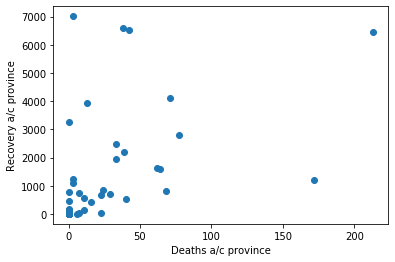

In [29]:
plt.scatter(all_province_death.values(),all_province_recovery.values())
plt.xlabel('Deaths a/c province')
plt.ylabel('Recovery a/c province')
plt.show()